# DATA PREPROCESSING 

In [153]:
import sys
sys.executable


'C:\\Users\\aryan\\OneDrive\\Desktop\\skills\\data science and machine learning\\food_delivery_analysis\\foodvenv\\Scripts\\python.exe'

In [155]:
import pandas as pd
import sqlite3


In [157]:
import pandas as pd

orders = pd.read_csv("orders.csv")



In [159]:
users = pd.read_json("users.json")


In [161]:
import sqlite3

conn = sqlite3.connect(":memory:")

with open("restaurants.sql") as f:
    conn.executescript(f.read())

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)


In [163]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)


In [165]:
orders_users.head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular


In [167]:
final_dataset = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)


In [169]:
final_dataset.head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Restaurant_35,Chinese,3.9
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Restaurant_57,Mexican,4.4
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Restaurant_7,Italian,3.2
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular,Restaurant_183,Chinese,3.7


In [171]:
final_dataset.drop(columns=["restaurant_name_y"], inplace=True)
final_dataset.rename(
    columns={"restaurant_name_x": "restaurant_name"},
    inplace=True
)


In [173]:
final_dataset.head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Italian,3.0
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Mexican,4.9
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Chinese,3.9
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Mexican,4.4
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Italian,3.2
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular,Chinese,3.7


In [175]:
final_dataset.to_csv("final_food_delivery_dataset.csv", index=False)


# DATA UNDERSTANDING

In [178]:
import pandas as pd

df = pd.read_csv("final_food_delivery_dataset.csv")

In [180]:
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Italian,3.0


In [182]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  str    
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  str    
 6   name             10000 non-null  str    
 7   city             10000 non-null  str    
 8   membership       10000 non-null  str    
 9   cuisine          10000 non-null  str    
 10  rating           10000 non-null  float64
dtypes: float64(2), int64(3), str(6)
memory usage: 859.5 KB


In [184]:
df.shape


(10000, 11)

In [186]:
df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name', 'name', 'city', 'membership', 'cuisine', 'rating'],
      dtype='str')

In [188]:
df.isna().sum()


order_id           0
user_id            0
restaurant_id      0
order_date         0
total_amount       0
restaurant_name    0
name               0
city               0
membership         0
cuisine            0
rating             0
dtype: int64

In [190]:
df["order_id"].nunique()


10000

In [192]:
df["user_id"].nunique()


2883

#### THIS MEANS THAT THERE ARE 2883 DIFFERENT USERS AND THE DATA SET CONTAINS 10000 ORDER IN TOTAL WITH MANY USERS ORDERING MORE THAN ONE TIME 

In [195]:
df["cuisine"].value_counts()


cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: count, dtype: int64

In [197]:
df["city"].value_counts()

city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: count, dtype: int64

In [199]:
df["membership"].value_counts()

membership
Regular    5013
Gold       4987
Name: count, dtype: int64

In [201]:
df.duplicated().sum()


np.int64(0)

In [203]:
df.dtypes

order_id             int64
user_id              int64
restaurant_id        int64
order_date             str
total_amount       float64
restaurant_name        str
name                   str
city                   str
membership             str
cuisine                str
rating             float64
dtype: object

In [334]:
round(
    df[df["membership"] == "Gold"]["total_amount"].mean(),
    2
)


np.float64(797.15)

# EXPLORATORY DATA ANALYSIS

## --- EDA – UNIVARIATE ANALYSIS

In [235]:
df["rating_bucket"] = pd.cut(
    df["rating"],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=["3.0-3.5", "3.6-4.0", "4.1-4.5", "4.6-5.0"],
    include_lowest=True
)


In [237]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=False)



In [239]:
df["month"] = df["order_date"].dt.month

In [241]:
df["quarter"] = df["order_date"].dt.to_period("Q")

In [243]:
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership,cuisine,rating,month,quarter,rating_bucket
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Mexican,3.2,2,2023Q1,3.0-3.5
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Indian,4.5,1,2023Q1,4.1-4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Mexican,4.0,7,2023Q3,3.6-4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Chinese,4.8,10,2023Q4,4.6-5.0
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Italian,3.0,12,2023Q4,3.0-3.5


### --- UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES

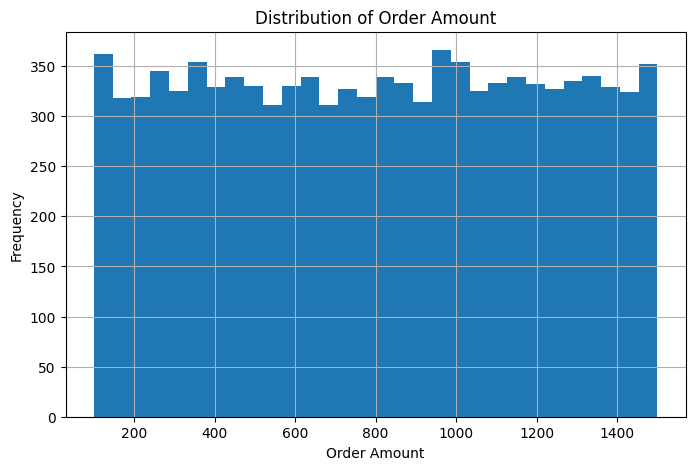

In [245]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["total_amount"].hist(bins=30)
plt.title("Distribution of Order Amount")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()


In [246]:
df["total_amount"].describe()


count    10000.000000
mean       801.162412
std        405.458753
min        100.200000
25%        446.310000
50%        806.295000
75%       1149.227500
max       1499.830000
Name: total_amount, dtype: float64

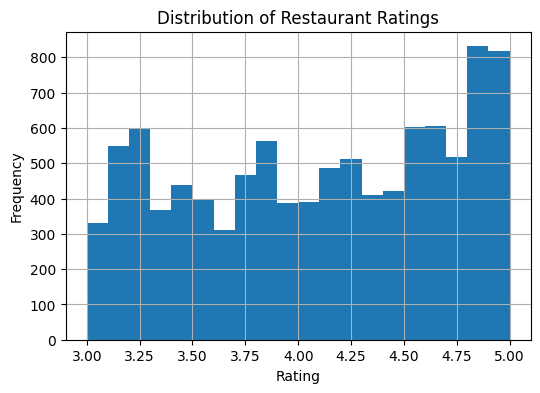

In [249]:
plt.figure(figsize=(6,4))
df["rating"].hist(bins=20)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [254]:
df["rating"].describe()


count    10000.000000
mean         4.045430
std          0.606531
min          3.000000
25%          3.500000
50%          4.100000
75%          4.600000
max          5.000000
Name: rating, dtype: float64

### --- UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES

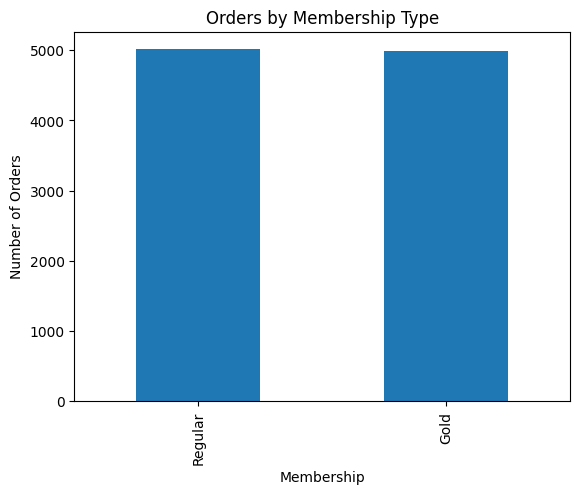

In [259]:
df["membership"].value_counts().plot(kind="bar")
plt.title("Orders by Membership Type")
plt.xlabel("Membership")
plt.ylabel("Number of Orders")
plt.show()


In [328]:
df[df["membership"] == "Gold"].shape[0]


4987

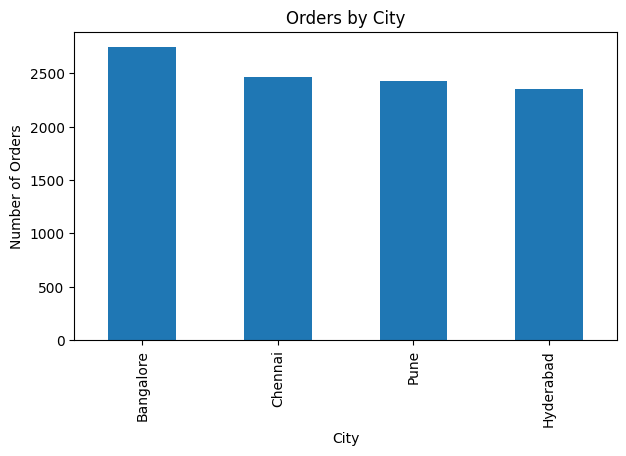

In [261]:
df["city"].value_counts().plot(kind="bar", figsize=(7,4))
plt.title("Orders by City")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.show()


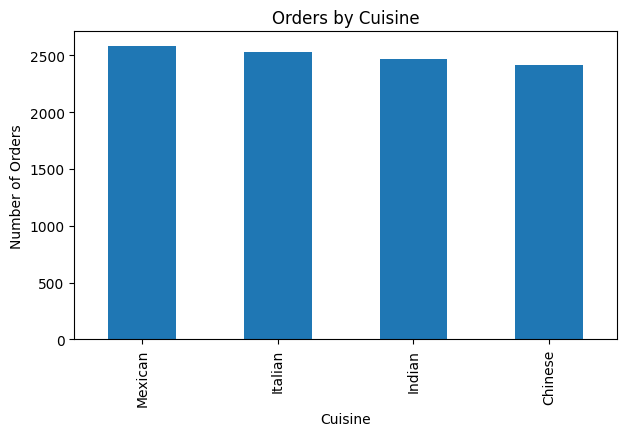

In [263]:
df["cuisine"].value_counts().plot(kind="bar", figsize=(7,4))
plt.title("Orders by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Number of Orders")
plt.show()


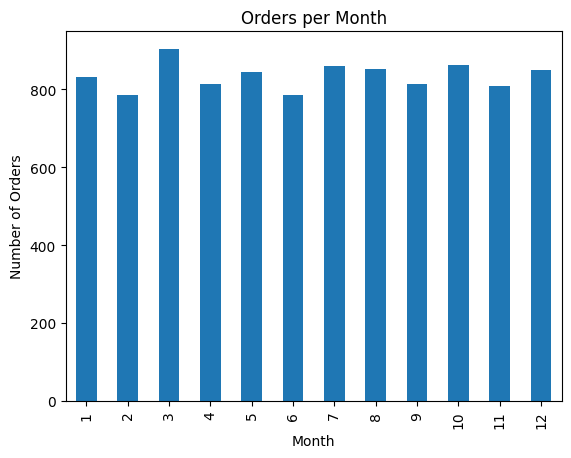

In [265]:
df["order_date"] = pd.to_datetime(df["order_date"])

df["order_date"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


## --- EDA - MULTIVARIATE ANALYSIS

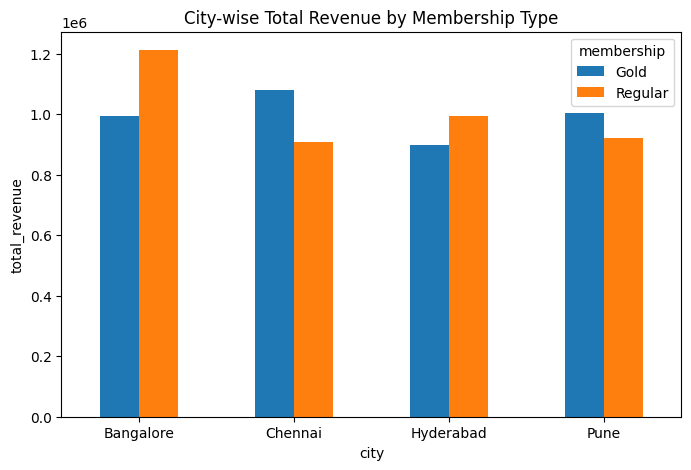

In [280]:
import matplotlib.pyplot as plt

city_membership_revenue = (
    df.groupby(["city", "membership"])["total_amount"]
    .sum()
    .rename("total_revenue")
    .unstack()
)

city_membership_revenue.plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("City-wise Total Revenue by Membership Type")
plt.xlabel("city")
plt.ylabel("total_revenue")
plt.xticks(rotation=0)
plt.legend(title="membership")
plt.show()


In [290]:
df[df["membership"] == "Gold"] \
.groupby("city")["total_amount"].sum() \
.sort_values(ascending=False)


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

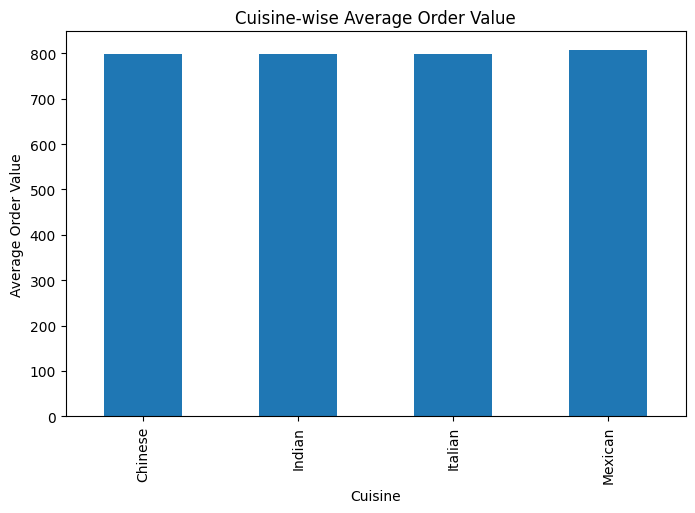

In [286]:
cuisine_aov = (
    df.groupby("cuisine")["total_amount"]
    .mean()
)

cuisine_aov.plot(kind="bar", figsize=(8,5))
plt.title("Cuisine-wise Average Order Value")
plt.xlabel("Cuisine")
plt.ylabel("Average Order Value")
plt.show()


In [288]:
df.groupby("cuisine")["total_amount"].mean() \
.sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

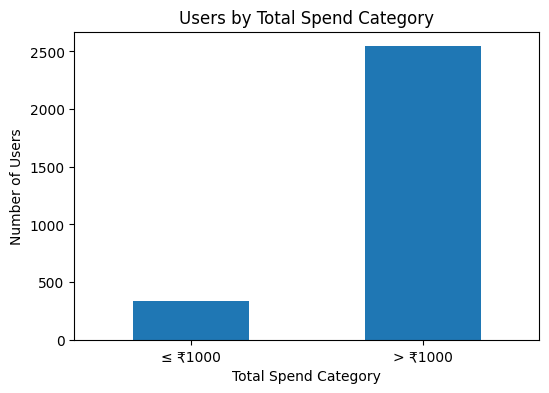

In [298]:
import matplotlib.pyplot as plt

user_spend = df.groupby("user_id")["total_amount"].sum()

# Explicit boolean categories
spend_category = user_spend > 1000

# Force correct order: False (≤1000), True (>1000)
spend_counts = spend_category.value_counts().sort_index()

spend_counts.index = ["≤ ₹1000", "> ₹1000"]

# Plot
spend_counts.plot(kind="bar", figsize=(6,4))
plt.title("Users by Total Spend Category")
plt.xlabel("Total Spend Category")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()


In [296]:
user_spend = df.groupby("user_id")["total_amount"].sum()
user_spend[user_spend > 1000].count()


np.int64(2544)

In [300]:
df.groupby("rating_bucket")["total_amount"].sum() \
.sort_values(ascending=False)


rating_bucket
4.6-5.0    2197030.75
3.0-3.5    2136772.70
4.1-4.5    1960326.26
3.6-4.0    1717494.41
Name: total_amount, dtype: float64

In [304]:
df[df["membership"] == "Gold"].groupby("city")["total_amount"].mean().sort_values(ascending=False)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [306]:
df.groupby("cuisine").agg(
    total_revenue=("total_amount", "sum"),
    restaurant_count=("restaurant_name", "nunique")
).sort_values("restaurant_count")


,total_revenue,restaurant_count
cuisine,,
Chinese,1930504.65,115
Indian,1971412.58,122
Italian,2024203.80,124
Mexican,2085503.09,124


In [308]:
round(
    (df[df["membership"] == "Gold"].shape[0] / df.shape[0]) * 100
)


50

In [322]:
restaurant_stats = df.groupby("restaurant_name").agg(
    avg_order_value=("total_amount", "mean"),
    order_count=("order_id", "count")
)

restaurant_stats[
    restaurant_stats["order_count"] < 20
].sort_values("avg_order_value", ascending=False).head(50)


,avg_order_value,order_count
restaurant_name,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19
Hotel Dhaba Chinese,973.125556,18
Amma Mess Pure Veg,965.299444,18
Hotel Biryani Pure Veg,964.577692,13
Annapurna Curry House Multicuisine,954.512353,17


In [324]:
df.groupby(["membership", "cuisine"])["total_amount"].sum() \
.sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [326]:
df.groupby("quarter")["total_amount"].sum() \
.sort_values(ascending=False)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

In [330]:
round(
    df[df["city"] == "Hyderabad"]["total_amount"].sum()
)


1889367

In [342]:
df[
    (df["membership"] == "Gold") &
    (df["city"] == "Chennai")
].shape[0]


1337

In [344]:
df[df["rating"] >= 4.5].shape[0]


3374